# Setup

## OpenAI Key 등록
- [OpenAI Key 발급](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = ''


## 구글 드라이브 연결

In [2]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


## install

In [54]:
!pip install langchain langchain_openai langchain_community faiss-cpu rank_bm25

# Loader

In [4]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(DATA_PATH+"nlp-keywords.txt")

docs = loader.load()
len(docs)

1

# Splitter

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=600, chunk_overlap=0)

In [6]:
split_doc1 = text_splitter.split_documents(docs)
len(split_doc1)

11

# Embedding

In [7]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# Vector DB

In [8]:
import faiss
from langchain_community.vectorstores import FAISS

In [9]:
# DB 생성
db = FAISS.from_documents(
    documents=split_doc1, embedding=embeddings)

# [Retriever](https://python.langchain.com/docs/how_to/#retrievers)
- Retrieval Augmented Generation (RAG)에서 `검색도구(Retrievers)` 는 벡터 저장소에서 문서를 검색하는 도구입니다.
- LangChain은 간단한 의미 검색도구부터 성능 향상을 위해 고려된 다양한 검색 알고리즘을 지원합니다.

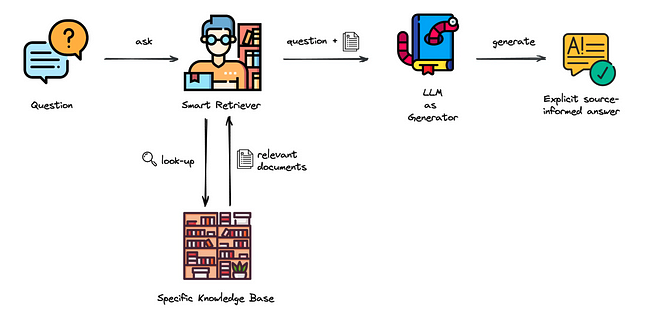

## [벡터스토어 기반 검색기](https://wikidocs.net/234016)
- VectorStore 지원 검색기 는 vector store를 사용하여 문서를 검색하는 retriever입니다.
- Vector store에 구현된 `유사도 검색(similarity search)` 이나 `MMR` 과 같은 검색 메서드를 사용하여 vector store 내의 텍스트를 쿼리합니다.

### Retriever
- as_retriever 메서드는 VectorStore 객체를 기반으로 VectorStoreRetriever를 초기화하고 반환합니다. 이 메서드를 통해 다양한 검색 옵션을 설정하여 사용자의 요구에 맞는 문서 검색을 수행할 수 있습니다.
- 매개변수(parameters)
  - `**kwargs`: 검색 함수에 전달할 키워드 인자
  - `search_type`: 검색 유형 ("similarity", "mmr", "similarity_score_threshold")
  - `search_kwargs`: 추가 검색 옵션
  - `k`: 반환할 문서 수 (기본값: 4)
  - `score_threshold`: similarity_score_threshold 검색의 최소 유사도 임계값
  - `fetch_k`: MMR 알고리즘에 전달할 문서 수 (기본값: 20)
  - `lambda_mult`: MMR 결과의 다양성 조절 (0-1 사이, 기본값: 0.5)
  - `filter`: 문서 메타데이터 기반 필터링

In [10]:
# 데이터베이스를 검색기로 사용하기 위해 retriever 변수에 할당
retriever = db.as_retriever()


- `invoke 메서드`는 Retriever의 주요 진입점으로, 관련 문서를 검색하는 데 사용됩니다. 이 메서드는 동기적으로 Retriever를 호출하여 주어진 쿼리에 대한 관련 문서를 반환합니다.
- 매개변수(parameters)
  - `input`: 검색 쿼리 문자열
  - `config`: Retriever 구성 (Optional[RunnableConfig])
  - `**kwargs`: Retriever에 전달할 추가 인자

In [11]:
# 관련 문서를 검색
docs = retriever.invoke(input="TF IDF 에 대하여 알려줘")

for doc in docs:
    print(doc.page_content)
    print("=========================================================")


정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser

정의: 파서는 주어진 데이터(문자열, 파일 등)를 분석하여 구조화된 형태로 변환하는 도구입니다. 이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생

#### MMR
- MMR(Maximal Marginal Relevance) 방식은 쿼리에 대한 관련 항목을 검색할 때 검색된 문서의 중복 을 피하는 방법 중 하나입니다.
- 단순히 가장 관련성 높은 항목들만을 검색하는 대신, MMR은 쿼리에 대한 문서의 관련성 과 이미 선택된 문서들과의 차별성을 동시에 고려 합니다.
  - `search_type`: `"mmr"` 로 설정하여 MMR(Maximal Marginal Relevance) 검색 알고리즘을 사용합니다.
  - `k`: 반환할 문서 수 (기본값: 4)
  - `fetch_k`: MMR 알고리즘에 전달할 문서 수 (기본값: 20)
  - `lambda_mult`: MMR 결과의 다양성 조절 (0~1, 기본값: 0.5, 0: 유사도 점수만 고려, 1: 다양성만 고려)

In [12]:
# MMR(Maximal Marginal Relevance) 검색 유형을 지정
retriever = db.as_retriever(
    search_type="mmr", search_kwargs={"k": 2, "fetch_k": 10, "lambda_mult": 0.6}
)

In [13]:
# 관련 문서를 검색합니다.
docs = retriever.invoke("TF IDF 에 대하여 알려줘")

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")

정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
GPT (Generative Pretrained Transformer)

정의: GPT는 대규모의 데이터셋으로 사전 훈련된 생성적 언어 모델로, 다양한 텍스트 기반 작업에 활용됩니다. 이는 입력된 텍스트에 기반하여 자연스러운 언어를 생성할 수 있습니다.
예시: 사용자가 제공한 질문에 대해 자세한 답변을 생성하는 챗봇은 GPT 모델을 사용할 수 있습니다.
연관키워드: 자연어 처리, 텍스트 생성, 딥러닝

InstructGPT

정의: InstructGPT는 사용자의 지시에 따라 특정한 작업을 수행하기 위해 최적화된 GPT 모델입니다. 이 모델은 보다 정확하고 관련성 높은 결과를 생성하도록 설계되었습니다.
예시: 사용자가 "이메일 초안 작성"과 같은 특정 지시를 제공하면, InstructGPT는 관련 내용을 기반으로 이메일을 작성합니다.
연관키워드: 인공지능, 자연어 이해, 명령 기반 처리

Keyword Search


#### 유사도 점수 임계값 검색
- 유사도 점수 임계값을 설정하고 해당 임계값 이상의 점수를 가진 문서만 반환하는 검색 방법을 설정할 수 있습니다.
- 임계값을 적절히 설정함으로써 관련성이 낮은 문서를 필터링 하고, 질의와 가장 유사한 문서만 선별 할 수 있습니다.
  - `search_type` 매개변수를 `"similarity_score_threshold"` 로 설정하여 유사도 점수 임계값을 기준으로 검색을 수행합니다.
  - `search_kwargs` 매개변수에 `{"score_threshold": 0.8}`를 전달하여 유사도 점수 임계값을 0.8로 설정합니다. 이는 검색 결과의 유사도 점수가 0.8 이상인 문서만 반환됨 을 의미합니다.

In [14]:
retriever = db.as_retriever(
    # 검색 유형을 "similarity_score_threshold 으로 설정
    search_type="similarity_score_threshold",
    # 임계값 설정
    search_kwargs={"score_threshold": 0.8},
)


In [15]:
# 관련 문서를 검색
for doc in retriever.invoke("TF IDF 에 대하여 알려줘"):
    print(doc.page_content)
    print("=========================================================")


/usr/local/lib/python3.10/dist-packages/langchain_core/vectorstores/base.py:1083: UserWarning: Relevance scores must be between 0 and 1, got [(Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'), 0.07459530282521731), (Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: 오픈 소스는 소스 코드가 공

#### top_k
- 검색 시 사용할 k 와 같은 검색 키워드 인자(kwargs)를 지정할 수 있습니다.
  - `k` 매개변수는 검색 결과에서 반환할 상위 결과의 개수를 나타냅니다.
  - `search_kwargs`에서 k 매개변수를 1로 설정하여 검색 결과로 반환할 문서의 수를 지정합니다.

In [16]:
# k 설정
retriever = db.as_retriever(search_kwargs={"k": 1})


In [17]:
# 관련 문서를 검색
docs = retriever.invoke("TF IDF 에 대하여 알려줘")

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")


정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame


#### 동적 설정(Configurable)
- 검색 설정을 동적으로 조정하기 위해 `ConfigurableField` 를 사용합니다.
- `ConfigurableField` 는 검색 매개변수의 고유 식별자, 이름, 설명을 설정하는 역할을 합니다.
- 검색 설정을 조정하기 위해 `config` 매개변수를 사용하여 검색 설정을 지정합니다.
- 검색 설정은 `config` 매개변수에 전달된 딕셔너리의 `configurable` 키에 저장됩니다.
- 검색 설정은 검색 쿼리와 함께 전달되며, 검색 쿼리에 따라 동적으로 조정됩니다.

In [18]:
retriever = db.as_retriever()

In [19]:
# 검색 설정을 지정. Faiss 검색에서 k=3로 설정하여 가장 유사한 문서 3개를 반환
config = {"configurable": {"search_kwargs": {"k": 3}}}

# 관련 문서를 검색
docs = retriever.invoke("TF IDF 에 대하여 알려줘", config=config)

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")


정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser

정의: 파서는 주어진 데이터(문자열, 파일 등)를 분석하여 구조화된 형태로 변환하는 도구입니다. 이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생

In [20]:
# 검색 설정을 지정. score_threshold 0.8 이상의 점수를 가진 문서만 반환
config = {
    "configurable": {
        "search_type": "similarity_score_threshold",
        "search_kwargs": {
            "score_threshold": 0.8,
        },
    }
}

# 관련 문서를 검색
docs = retriever.invoke("TF IDF 에 대하여 알려줘", config=config)

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")


정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser

정의: 파서는 주어진 데이터(문자열, 파일 등)를 분석하여 구조화된 형태로 변환하는 도구입니다. 이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생

In [21]:
# 검색 설정을 지정. mmr 검색 설정.
config = {
    "configurable": {
        "search_type": "mmr",
        "search_kwargs": {"k": 2, "fetch_k": 10, "lambda_mult": 0.6},
    }
}

# 관련 문서를 검색
docs = retriever.invoke("TF IDF 에 대하여 알려줘", config=config)

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")


정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser

정의: 파서는 주어진 데이터(문자열, 파일 등)를 분석하여 구조화된 형태로 변환하는 도구입니다. 이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생

## [문맥 압축 검색기](https://wikidocs.net/234097)
- 검색 시스템에서 직면하는 어려움 중 하나는 데이터를 시스템에 수집할 때 어떤 특정 질의를 처리해야 할지 미리 알 수 없다는 점입니다.
- 이는 질의와 가장 관련성이 높은 정보가 많은 양의 무관한 텍스트를 포함한 문서에 묻혀 있을 수 있음을 의미합니다.
- 이러한 전체 문서를 애플리케이션에 전달하면 더 비용이 많이 드는 LLM 호출과 품질이 낮은 응답으로 이어질 수 있습니다.
- `ContextualCompressionRetriever` 은 이 문제를 해결하기 위해 고안되었습니다.
- 아이디어는 간단합니다. 검색된 문서를 그대로 즉시 반환하는 대신, 주어진 질의의 맥락을 사용하여 문서를 압축함으로써 관련 정보만 반환되도록 할 수 있습니다.
- 여기서 "압축"은 개별 문서의 내용을 압축하는 것과 문서를 전체적으로 필터링하는 것 모두를 의미합니다.

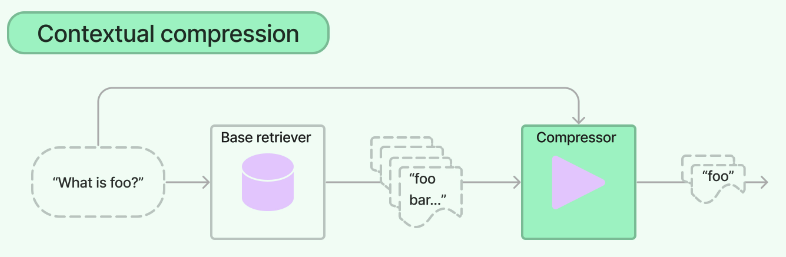

### LLM

In [26]:
from langchain_openai import OpenAI

# model="gpt-4o-mini"를 사용하면 오류 발생
llm = OpenAI(temperature=0)

### Compressor

In [27]:
from langchain.retrievers.document_compressors import LLMChainExtractor

compressor = LLMChainExtractor.from_llm(llm)

- Retriever

In [28]:
from langchain.retrievers import ContextualCompressionRetriever

compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=db.as_retriever()
)

In [29]:
# 관련 문서를 검색합니다.
docs = compression_retriever.invoke("TF IDF 에 대하여 알려줘")

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링
정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.
예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.
연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화


### LLMChainFilter
- LLMChainFilter는 초기에 검색된 문서 중 어떤 문서를 필터링하고 어떤 문서를 반환할지 결정하기 위해 LLM 체인을 사용하는 보다 단순하지만 강력한 압축기입니다.
- 이 필터는 문서 내용을 변경(압축)하지 않고 문서를 선택적으로 반환 합니다.

In [30]:
from langchain.retrievers.document_compressors import LLMChainFilter

_filter = LLMChainFilter.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=_filter, base_retriever=db.as_retriever()
)


In [31]:
# 관련 문서를 검색합니다.
docs = compression_retriever.invoke("TF IDF 에 대하여 알려줘")

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")

정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser

정의: 파서는 주어진 데이터(문자열, 파일 등)를 분석하여 구조화된 형태로 변환하는 도구입니다. 이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생성하는 것은 파싱의 한 예입니다.
연관키워드: 구문 분석, 컴파일러, 데이터 처리

TF-IDF (Term Frequency-Inverse Document Frequency)
GPT (Generative Pretrained Transformer)

정의: GPT는 대규모의 데이터셋으로 사전 훈련된 생성적 언어 모델로, 다양한 텍스트 기반 작업에 활용됩니다. 이는 입력된 텍스트에 기반하여 자연스러운 언어를 생성할 수 있습니다.
예시: 사용자가 제공한 질문에 대해 자세한 답변을 생성하는 챗봇은 GPT 모델을 사용할 수 있습니다.
연관키워드: 자연어 처리, 텍스트 생성, 딥러닝

InstructGPT

정의: InstructGPT는 사용자의 지시에 따라 특정한 작업을 수행하기 위해 최적화된 GPT 모델입니다. 이 모델은 보다 정확하고 관련성 높은 결과를 생성하도록 설계되었습니다.
예시: 사용자가 "이메일 초안 작성"과 같은 특정 지시를 제공하면, InstructGPT는 관련 내용을 기반으로 이메일을 작성합니다.
연관키워드: 인

### EmbeddingsFilter
- 각각의 검색된 문서에 대해 추가적인 LLM 호출을 수행하는 것은 비용이 많이 들고 속도가 느립니다.
- `EmbeddingsFilter`는 문서와 쿼리를 임베딩하고 쿼리와 충분히 유사한 임베딩을 가진 문서만 반환함으로써 더 저렴하고 빠른 옵션을 제공합니다.
- 이를 통해 검색 결과의 관련성을 유지하면서도 계산 비용과 시간을 절약할 수 있습니다.
- `EmbeddingsFilter` 와 `ContextualCompressionRetriever` 를 사용하여 관련 문서를 압축하고 검색하는 과정입니다.

In [32]:
from langchain.retrievers.document_compressors import EmbeddingsFilter
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()
embeddings_filter = EmbeddingsFilter(embeddings=embeddings, similarity_threshold=0.76)

In [33]:
compression_retriever = ContextualCompressionRetriever(
    base_compressor=embeddings_filter, base_retriever=retriever
)

In [34]:
# 관련 문서를 검색합니다.
docs = compression_retriever.invoke("TF IDF 에 대하여 알려줘")

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")

정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser

정의: 파서는 주어진 데이터(문자열, 파일 등)를 분석하여 구조화된 형태로 변환하는 도구입니다. 이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생

### 파이프라인 생성(압축기+문서 변환기)
- `DocumentCompressorPipeline` 을 사용하면 여러 compressor를 순차적으로 결합할 수 있습니다.
- `Compressor`와 함께 `BaseDocumentTransformer`를 파이프라인에 추가할 수 있는데, 이는 맥락적 압축을 수행하지 않고 단순히 문서 집합에 대한 변환을 수행합니다.
- 예를 들어, `TextSplitter`는 문서를 더 작은 조각으로 분할하기 위해 `document transformer`로 사용될 수 있으며, `EmbeddingsRedundantFilter`는 문서 간의 임베딩 유사성(기본값: 0.95 유사도 이상을 중복 문서로 간주) 을 기반으로 중복 문서를 필터링하는 데 사용될 수 있습니다.

In [35]:
from langchain_community.document_transformers import EmbeddingsRedundantFilter
from langchain_text_splitters import CharacterTextSplitter

splitter = CharacterTextSplitter(chunk_size=300, chunk_overlap=0, separator=". ")
redundant_filter = EmbeddingsRedundantFilter(embeddings=embeddings)
relevant_filter = EmbeddingsFilter(embeddings=embeddings, similarity_threshold=0.76)

In [36]:
from langchain.retrievers.document_compressors import DocumentCompressorPipeline

pipeline_compressor = DocumentCompressorPipeline(
    transformers=[splitter, redundant_filter, relevant_filter]
)

In [37]:
compression_retriever = ContextualCompressionRetriever(
    base_compressor=pipeline_compressor, base_retriever=retriever
)

In [38]:
# 관련 문서를 검색합니다.
docs = compression_retriever.invoke("TF IDF 에 대하여 알려줘")

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")

정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다
이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생성하는 것은 파싱의 한 예입니다.
연관키워드: 구문 분석, 컴파일러, 데이터 처리

TF-IDF (Term Frequency-Inverse Document Frequency)
이 모델은 보다 정확하고 관련성 높은 결과를 생성하도록 설계되었습니다.
예시: 사용자가 "이메일 초안 작성"과 같은 특정 지시를 제공하면, InstructGPT는 관련 내용을 기반으로 이메일을 작성합니다.
연관키워드: 인공지능, 자연어 이해, 명령 기반 처리

Keyword Search


## [다중 쿼리 검색기](https://wikidocs.net/234109)
- 거리 기반 벡터 데이터베이스 검색은 고차원 공간에서의 쿼리 임베딩(표현)과 '거리'를 기준으로 유사한 임베딩을 가진 문서를 찾는 방식입니다. 하지만 쿼리의 세부적인 차이나 임베딩이 데이터의 의미를 제대로 포착하지 못할 경우, 검색 결과가 달라질 수 있습니다. 또한, 이를 수동으로 조정하는 프롬프트 엔지니어링이나 튜닝 작업은 번거로울 수 있습니다.
- 이런 문제를 해결하기 위해, `MultiQueryRetriever` 는 주어진 사용자 입력 쿼리에 대해 다양한 관점에서 여러 쿼리를 자동으로 생성하는 LLM(Language Learning Model)을 활용해 프롬프트 튜닝 과정을 자동화합니다.
- 이 방식은 각각의 쿼리에 대해 관련 문서 집합을 검색하고, 모든 쿼리를 아우르는 고유한 문서들의 합집합을 추출해, 잠재적으로 관련된 더 큰 문서 집합을 얻을 수 있게 해줍니다.
- 여러 관점에서 동일한 질문을 생성함으로써, `MultiQueryRetriever` 는 거리 기반 검색의 제한을 일정 부분 극복하고, 더욱 풍부한 검색 결과를 제공할 수 있습니다.

### LLM

In [39]:
from langchain_openai import ChatOpenAI

# ChatOpenAI 언어 모델을 초기화합니다. temperature는 0으로 설정합니다.
llm = ChatOpenAI(temperature=0, model="gpt-4o-mini")

### MultiQueryRetriever

In [40]:
from langchain.retrievers.multi_query import MultiQueryRetriever

# MultiQueryRetriever를 언어 모델을 사용하여 초기화합니다.
multiquery_retriever = MultiQueryRetriever.from_llm(
    # 벡터 데이터베이스의 retriever와 언어 모델을 전달합니다.
    retriever=db.as_retriever(),
    llm=llm,
)


### 디버깅
- 아래는 다중 쿼리를 생성하는 중간 과정을 디버깅하기 위하여 실행하는 코드입니다.
- 먼저 `"langchain.retrievers.multi_query"` 로거를 가져옵니다.
- 이는 `logging.getLogger()` 함수를 사용하여 수행됩니다. 그 다음, 이 로거의 로그 레벨을 `INFO`로 설정하여, `INFO` 레벨 이상의 로그 메시지만 출력되도록 할 수 있습니다.

In [41]:
# 쿼리에 대한 로깅 설정
import logging

logging.basicConfig()
logging.getLogger("langchain.retrievers.multi_query").setLevel(logging.INFO)


- 이 코드는 `retriever_from_llm` 객체의 `invoke()` 메서드를 사용하여 주어진 `question`과 관련된 문서를 검색합니다.
- 검색된 문서들은 `unique_docs`라는 변수에 저장되며, 이 변수의 길이를 확인함으로써 검색된 관련 문서의 총 개수를 알 수 있습니다.
- 이 과정을 통해 사용자의 질문에 대한 관련 정보를 효과적으로 찾아내고 그 양을 파악할 수 있습니다.

In [43]:
# 질문을 정의합니다.
question = "TF IDF 에 대하여 알려줘"
# 문서 검색
relevant_docs = multiquery_retriever.invoke(input=question)

# 검색된 고유한 문서의 개수를 반환합니다.
print(
    f"===============\n검색된 문서 개수: {len(relevant_docs)}",
    end="\n===============\n",
)

# 검색된 문서의 내용을 출력합니다.
print(relevant_docs[0].page_content)


INFO:langchain.retrievers.multi_query:Generated queries: ['TF-IDF에 대한 설명을 해줄 수 있나요?  ', 'TF-IDF의 개념과 활용 방법에 대해 알고 싶습니다.  ', 'TF-IDF란 무엇인지 자세히 설명해 주세요.']


검색된 문서 개수: 5
정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame


### LCEL Chain
- 사용자 정의 프롬프트 정의하고, 정의한 프롬프트와 함께 Chain 을 생성합니다.
- Chain 은 사용자의 질문을 입력 받으면 (아래의 예제에서는) 5개의 질문을 생성한 뒤 "\n" 구분자로 구분하여 생성된 5개 질문을 반환합니다.

#### Prompt

In [44]:
from langchain_core.prompts import PromptTemplate

# 프롬프트 템플릿을 정의합니다.(5개의 질문을 생성하도록 프롬프트를 작성하였습니다)
prompt = PromptTemplate.from_template(
    """
    You are an AI language model assistant.
    Your task is to generate five different versions of the given user question to retrieve relevant documents from a vector database.
    By generating multiple perspectives on the user question, your goal is to help the user overcome some of the limitations of the distance-based similarity search.
    Your response should be a list of values separated by new lines, eg: `foo\nbar\nbaz\n`

    #ORIGINAL QUESTION:
    {question}

    #Answer in Korean:
    """
)

#### LLM

In [45]:
# 언어 모델 인스턴스를 생성합니다.
llm = ChatOpenAI(temperature=0, model="gpt-4o-mini")

#### chain

In [46]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

# LLMChain을 생성합니다.
custom_multiquery_chain = (
    {"question": RunnablePassthrough()} | prompt | llm | StrOutputParser()
)

In [47]:
# 질문을 정의합니다.
question = "TF IDF 에 대하여 알려줘"

# 체인을 실행하여 생성된 다중 쿼리를 확인합니다.
multi_queries = custom_multiquery_chain.invoke(question)

# 결과를 확인합니다.(5개 질문 생성)
multi_queries

'TF IDF에 대한 설명을 해줄 수 있나요?  \nTF IDF의 개념과 활용 방법은 무엇인가요?  \nTF IDF의 정의와 예시를 알고 싶습니다.  \nTF IDF의 원리와 장점에 대해 설명해 주세요.  \nTF IDF를 사용하는 이유와 그 중요성은 무엇인가요?  '

#### MultiQueryRetriever

In [48]:
multiquery_retriever = MultiQueryRetriever.from_llm(
    llm=custom_multiquery_chain, retriever=db.as_retriever()
)


In [49]:
# 결과
relevant_docs = multiquery_retriever.invoke(question)

# 검색된 고유한 문서의 개수를 반환합니다.
print(
    f"===============\n검색된 문서 개수: {len(relevant_docs)}",
    end="\n===============\n",
)

# 검색된 문서의 내용을 출력합니다.
print(relevant_docs[0].page_content)


INFO:langchain.retrievers.multi_query:Generated queries: ['TF IDF에 대해 설명해 줄 수 있나요?  ', 'TF IDF의 개념과 사용 사례는 무엇인가요?  ', 'TF IDF가 정보 검색에서 어떻게 활용되는지 알고 싶어요.  ', 'TF IDF의 정의와 그 중요성에 대해 알려주세요.  ', 'TF IDF에 대한 자세한 정보를 제공해 주실 수 있나요?']


검색된 문서 개수: 8
정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame


## [앙상블 검색기](https://wikidocs.net/234100)
- EnsembleRetriever는 여러 검색기를 결합하여 더 강력한 검색 결과를 제공하는 LangChain의 기능입니다. 이 검색기는 다양한 검색 알고리즘의 장점을 활용하여 단일 알고리즘보다 더 나은 성능을 달성할 수 있습니다.
- 주요 특징
  1. `여러 검색기 통합`: 다양한 유형의 검색기를 입력으로 받아 결과를 결합합니다.
  2. `결과 재순위화`: Reciprocal Rank Fusion 알고리즘을 사용하여 결과의 순위를 조정합니다.
  3. `하이브리드 검색`: 주로 sparse retriever(예: BM25)와 dense retriever(예: 임베딩 유사도)를 결합하여 사용합니다.
- 장점
  - `Sparse retriever`: 키워드 기반 검색에 효과적
  - `Dense retriever`: 의미적 유사성 기반 검색에 효과적

이러한 상호 보완적인 특성으로 인해 `EnsembleRetriever`는 다양한 검색 시나리오에서 향상된 성능을 제공할 수 있습니다.

In [55]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings

In [56]:
# 샘플 문서 리스트
doc_list = [
    "I like apples",
    "I like apple company",
    "I like apple's iphone",
    "Apple is my favorite company",
    "I like apple's ipad",
    "I like apple's macbook",
]

In [57]:
# 검색 결과 문서를 가져옵니다.
query = "my favorite fruit is apple"

### bm25_retriever

In [58]:
# bm25 retriever와 faiss retriever를 초기화합니다.
bm25_retriever = BM25Retriever.from_texts(
    doc_list,
)
bm25_retriever.k = 1  # BM25Retriever의 검색 결과 개수를 1로 설정합니다.

In [59]:
bm25_result = bm25_retriever.invoke(query)

print("[BM25 Retriever]")
for doc in bm25_result:
    print(f"Content: {doc.page_content}")
    print()

[BM25 Retriever]
Content: Apple is my favorite company



### faiss_retriever

In [60]:
embedding = OpenAIEmbeddings()  # OpenAI 임베딩을 사용합니다.

In [61]:
faiss_vectorstore = FAISS.from_texts(
    doc_list,
    embedding,
)

In [62]:
faiss_retriever = faiss_vectorstore.as_retriever(
                                        search_kwargs={"k": 1})

In [63]:
faiss_result = faiss_retriever.invoke(query)

print("[FAISS Retriever]")
for doc in faiss_result:
    print(f"Content: {doc.page_content}")
    print()

[FAISS Retriever]
Content: I like apples



### EnsembleRetriever
- EnsembleRetriever를 초기화하여 `BM25Retriever`와 `FAISS` 검색기를 결합합니다. 각 검색기의 가중치를 설정됩니다.

In [64]:
# 앙상블 retriever를 초기화합니다.
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, faiss_retriever],
    weights=[0.7, 0.3],
)

- `ensemble_retriever` 객체의 `get_relevant_documents()` 메서드를 호출하여 관련성 높은 문서를 검색합니다.

In [65]:
ensemble_result = ensemble_retriever.invoke(query)

print("[Ensemble Retriever]")
for doc in ensemble_result:
    print(f"Content: {doc.page_content}")
    print()

[Ensemble Retriever]
Content: Apple is my favorite company

Content: I like apples



## [긴 문맥 재정렬](https://wikidocs.net/234101)
- 모델의 아키텍처와 상관없이, 10개 이상의 검색된 문서를 포함할 경우 성능이 상당히 저하됩니다.
- 간단히 말해, 모델이 긴 컨텍스트 중간에 있는 관련 정보에 접근해야 할 때, 제공된 문서를 무시하는 경향이 있습니다.
- 이 문제를 피하기 위해, 검색 후 문서의 순서를 재배열하여 성능 저하를 방지할 수 있습니다.

In [66]:
texts = [
    "이건 그냥 내가 아무렇게나 적어본 글입니다.",
    "사용자와 대화하는 것처럼 설계된 AI인 ChatGPT는 다양한 질문에 답할 수 있습니다.",
    "아이폰, 아이패드, 맥북 등은 애플이 출시한 대표적인 제품들입니다.",
    "챗GPT는 OpenAI에 의해 개발되었으며, 지속적으로 개선되고 있습니다.",
    "챗지피티는 사용자의 질문을 이해하고 적절한 답변을 생성하기 위해 대량의 데이터를 학습했습니다.",
    "애플 워치와 에어팟 같은 웨어러블 기기도 애플의 인기 제품군에 속합니다.",
    "ChatGPT는 복잡한 문제를 해결하거나 창의적인 아이디어를 제안하는 데에도 사용될 수 있습니다.",
    "비트코인은 디지털 금이라고도 불리며, 가치 저장 수단으로서 인기를 얻고 있습니다.",
    "ChatGPT의 기능은 지속적인 학습과 업데이트를 통해 더욱 발전하고 있습니다.",
    "FIFA 월드컵은 네 번째 해마다 열리며, 국제 축구에서 가장 큰 행사입니다.",
]

### Vector DB

In [67]:
from langchain_openai import OpenAIEmbeddings

# 임베딩을 가져옵니다.
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

In [68]:
# 검색기를 생성합니다. (K는 10으로 설정합니다)
retriever = FAISS.from_texts(texts, embedding=embeddings).as_retriever(
    search_kwargs={"k": 10}
)

In [69]:
query = "ChatGPT에 대해 무엇을 말해줄 수 있나요?"

# 관련성 점수에 따라 정렬된 관련 문서를 가져옵니다.
docs = retriever.invoke(query)
docs


[Document(metadata={}, page_content='ChatGPT는 복잡한 문제를 해결하거나 창의적인 아이디어를 제안하는 데에도 사용될 수 있습니다.'),
 Document(metadata={}, page_content='ChatGPT의 기능은 지속적인 학습과 업데이트를 통해 더욱 발전하고 있습니다.'),
 Document(metadata={}, page_content='사용자와 대화하는 것처럼 설계된 AI인 ChatGPT는 다양한 질문에 답할 수 있습니다.'),
 Document(metadata={}, page_content='챗GPT는 OpenAI에 의해 개발되었으며, 지속적으로 개선되고 있습니다.'),
 Document(metadata={}, page_content='이건 그냥 내가 아무렇게나 적어본 글입니다.'),
 Document(metadata={}, page_content='챗지피티는 사용자의 질문을 이해하고 적절한 답변을 생성하기 위해 대량의 데이터를 학습했습니다.'),
 Document(metadata={}, page_content='비트코인은 디지털 금이라고도 불리며, 가치 저장 수단으로서 인기를 얻고 있습니다.'),
 Document(metadata={}, page_content='아이폰, 아이패드, 맥북 등은 애플이 출시한 대표적인 제품들입니다.'),
 Document(metadata={}, page_content='애플 워치와 에어팟 같은 웨어러블 기기도 애플의 인기 제품군에 속합니다.'),
 Document(metadata={}, page_content='FIFA 월드컵은 네 번째 해마다 열리며, 국제 축구에서 가장 큰 행사입니다.')]

In [70]:
def format_docs(docs):
    return "\n".join([doc.page_content for i, doc in enumerate(docs)])


In [71]:
print(format_docs(docs))


ChatGPT는 복잡한 문제를 해결하거나 창의적인 아이디어를 제안하는 데에도 사용될 수 있습니다.
ChatGPT의 기능은 지속적인 학습과 업데이트를 통해 더욱 발전하고 있습니다.
사용자와 대화하는 것처럼 설계된 AI인 ChatGPT는 다양한 질문에 답할 수 있습니다.
챗GPT는 OpenAI에 의해 개발되었으며, 지속적으로 개선되고 있습니다.
이건 그냥 내가 아무렇게나 적어본 글입니다.
챗지피티는 사용자의 질문을 이해하고 적절한 답변을 생성하기 위해 대량의 데이터를 학습했습니다.
비트코인은 디지털 금이라고도 불리며, 가치 저장 수단으로서 인기를 얻고 있습니다.
아이폰, 아이패드, 맥북 등은 애플이 출시한 대표적인 제품들입니다.
애플 워치와 에어팟 같은 웨어러블 기기도 애플의 인기 제품군에 속합니다.
FIFA 월드컵은 네 번째 해마다 열리며, 국제 축구에서 가장 큰 행사입니다.


### LongContextReorder
- LongContextReorder 클래스의 인스턴스인 reordering을 생성합니다.
- reordering.transform_documents(docs)를 호출하여 문서 목록 docs를 재정렬합니다.
- 덜 관련된 문서는 목록의 중간에 위치하고, 더 관련된 문서는 시작과 끝에 위치하도록 재정렬됩니다.

In [72]:
from langchain_core.prompts import PromptTemplate
from langchain_community.document_transformers import LongContextReorder


In [73]:
# 문서를 재정렬합니다
# 덜 관련된 문서는 목록의 중간에 위치하고 더 관련된 요소는 시작/끝에 위치합니다.
reordering = LongContextReorder()
reordered_docs = reordering.transform_documents(docs)

# 4개의 관련 문서가 시작과 끝에 위치하는지 확인합니다.
reordered_docs


[Document(metadata={}, page_content='ChatGPT의 기능은 지속적인 학습과 업데이트를 통해 더욱 발전하고 있습니다.'),
 Document(metadata={}, page_content='챗GPT는 OpenAI에 의해 개발되었으며, 지속적으로 개선되고 있습니다.'),
 Document(metadata={}, page_content='챗지피티는 사용자의 질문을 이해하고 적절한 답변을 생성하기 위해 대량의 데이터를 학습했습니다.'),
 Document(metadata={}, page_content='아이폰, 아이패드, 맥북 등은 애플이 출시한 대표적인 제품들입니다.'),
 Document(metadata={}, page_content='FIFA 월드컵은 네 번째 해마다 열리며, 국제 축구에서 가장 큰 행사입니다.'),
 Document(metadata={}, page_content='애플 워치와 에어팟 같은 웨어러블 기기도 애플의 인기 제품군에 속합니다.'),
 Document(metadata={}, page_content='비트코인은 디지털 금이라고도 불리며, 가치 저장 수단으로서 인기를 얻고 있습니다.'),
 Document(metadata={}, page_content='이건 그냥 내가 아무렇게나 적어본 글입니다.'),
 Document(metadata={}, page_content='사용자와 대화하는 것처럼 설계된 AI인 ChatGPT는 다양한 질문에 답할 수 있습니다.'),
 Document(metadata={}, page_content='ChatGPT는 복잡한 문제를 해결하거나 창의적인 아이디어를 제안하는 데에도 사용될 수 있습니다.')]

In [74]:
def reorder_documents(docs):
    # 재정렬
    reordering = LongContextReorder()
    reordered_docs = reordering.transform_documents(docs)
    combined = format_docs(reordered_docs)
    print(combined)
    return combined

In [75]:
# 재정렬된 문서를 출력
_ = reorder_documents(docs)


ChatGPT의 기능은 지속적인 학습과 업데이트를 통해 더욱 발전하고 있습니다.
챗GPT는 OpenAI에 의해 개발되었으며, 지속적으로 개선되고 있습니다.
챗지피티는 사용자의 질문을 이해하고 적절한 답변을 생성하기 위해 대량의 데이터를 학습했습니다.
아이폰, 아이패드, 맥북 등은 애플이 출시한 대표적인 제품들입니다.
FIFA 월드컵은 네 번째 해마다 열리며, 국제 축구에서 가장 큰 행사입니다.
애플 워치와 에어팟 같은 웨어러블 기기도 애플의 인기 제품군에 속합니다.
비트코인은 디지털 금이라고도 불리며, 가치 저장 수단으로서 인기를 얻고 있습니다.
이건 그냥 내가 아무렇게나 적어본 글입니다.
사용자와 대화하는 것처럼 설계된 AI인 ChatGPT는 다양한 질문에 답할 수 있습니다.
ChatGPT는 복잡한 문제를 해결하거나 창의적인 아이디어를 제안하는 데에도 사용될 수 있습니다.


### 질의-응답 체인 생성

In [76]:
from langchain.prompts import ChatPromptTemplate
from operator import itemgetter
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda

#### prompt

In [77]:
# 프롬프트 템플릿
template = """Given this text extracts:
{context}

-----
Please answer the following question:
{question}

Answer in the following languages: {language}
"""

# 프롬프트 정의
prompt = ChatPromptTemplate.from_template(template)

#### chain

In [78]:
# Chain 정의
chain = (
    {
        "context": itemgetter("question")
        | retriever
        | RunnableLambda(reorder_documents),  # 질문을 기반으로 문맥을 검색합니다.
        "question": itemgetter("question"),  # 질문을 추출합니다.
        "language": itemgetter("language"),  # 답변 언어를 추출합니다.
    }
    | prompt  # 프롬프트 템플릿에 값을 전달합니다.
    | ChatOpenAI(model="gpt-4o-mini")  # 언어 모델에 프롬프트를 전달합니다.
    | StrOutputParser()  # 모델의 출력을 문자열로 파싱합니다.
)

question 에 쿼리를 입력하고 language 에 언어를 입력합니다.
- 재정렬된 문서의 검색 결과도 확인합니다.

In [79]:
answer = chain.invoke(
    {"question": "ChatGPT에 대해 무엇을 말해줄 수 있나요?", "language": "KOREAN"}
)


ChatGPT의 기능은 지속적인 학습과 업데이트를 통해 더욱 발전하고 있습니다.
챗GPT는 OpenAI에 의해 개발되었으며, 지속적으로 개선되고 있습니다.
챗지피티는 사용자의 질문을 이해하고 적절한 답변을 생성하기 위해 대량의 데이터를 학습했습니다.
아이폰, 아이패드, 맥북 등은 애플이 출시한 대표적인 제품들입니다.
FIFA 월드컵은 네 번째 해마다 열리며, 국제 축구에서 가장 큰 행사입니다.
애플 워치와 에어팟 같은 웨어러블 기기도 애플의 인기 제품군에 속합니다.
비트코인은 디지털 금이라고도 불리며, 가치 저장 수단으로서 인기를 얻고 있습니다.
이건 그냥 내가 아무렇게나 적어본 글입니다.
사용자와 대화하는 것처럼 설계된 AI인 ChatGPT는 다양한 질문에 답할 수 있습니다.
ChatGPT는 복잡한 문제를 해결하거나 창의적인 아이디어를 제안하는 데에도 사용될 수 있습니다.


In [82]:
answer


'ChatGPT는 OpenAI에 의해 개발된 인공지능으로, 사용자와 대화하는 데 최적화되어 있습니다. 이 AI는 대량의 데이터를 학습하여 사용자의 질문을 이해하고 적절한 답변을 생성하는 능력을 가지고 있습니다. ChatGPT는 지속적인 학습과 업데이트를 통해 기능이 발전하고 있으며, 복잡한 문제를 해결하거나 창의적인 아이디어를 제안하는 데에도 활용될 수 있습니다. 사용자는 다양한 질문을 통해 ChatGPT와 상호작용할 수 있으며, 이는 일상적인 대화부터 전문적인 주제까지 다양합니다.'